In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, LinearSVC
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Downloads/credit_scoring_sample.csv')
filtered_data = data[data["NumberOfTime30-59DaysPastDueNotWorse"] < 90]
filtered_data = filtered_data[filtered_data['NumberOfTime30-59DaysPastDueNotWorse'] < 90]
filtered_data = filtered_data[filtered_data['NumberOfTimes90DaysLate'] < 90]
filtered_data = filtered_data[filtered_data['DebtRatio'] < 10000]
filtered_data = filtered_data[filtered_data['MonthlyIncome'] < 100000]
X = filtered_data.fillna(data.median())
y = X.pop('SeriousDlqin2yrs')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=25000)

In [7]:
logit = LogisticRegression(solver='lbfgs')

In [8]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
logit.score(X_test, y_test)

0.8251902991679944

auc=0.7981726874404671


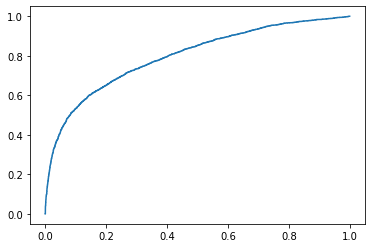

In [11]:
pred = logit.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('auc={}'.format(auc))
plt.plot(fpr, tpr)